In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trans= pd.read_csv('processed_trans.csv')
trans=trans.iloc[:,1:]

In [3]:
cust_demo= pd.read_csv('processed_cust_demo.csv')
cust_demo.head()

,Unnamed: 0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42
1,8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,49
2,9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,34
3,11,12,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8.0,28
4,13,14,Rayshell,Kitteman,Female,85,1983-03-25,Account Executive,Financial Services,Affluent Customer,N,No,6.0,39


In [4]:
cust_demo=cust_demo.iloc[:,1:]

In [5]:
cust_address= pd.read_csv("processed_cust_address.csv")

In [6]:
cust_address.head()

,Unnamed: 0,customer_id,address,postcode,state,country,property_valuation
0,0,1,060 Morning Avenue,2016,NSW,Australia,10
1,1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,4,6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
cust_address=cust_address.iloc[:,1:]

In [8]:
cust_demo.drop(['first_name', 'last_name'], axis=1, inplace=True)
cust_address.drop(['address','country'],axis=1, inplace= True)

    Joining all 3 tables to get the `final` table:

In [9]:
info= cust_demo.merge(cust_address, on= 'customer_id', how='left')

In [10]:
info.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,postcode,state,property_valuation
0,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42,2153.0,NSW,10.0
1,9,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,49,2023.0,NSW,12.0
2,10,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,34,NaN,NaN,NaN
3,12,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8.0,28,4557.0,QLD,4.0
4,14,Female,85,1983-03-25,Account Executive,Financial Services,Affluent Customer,N,No,6.0,39,2760.0,NSW,8.0


In [11]:
trans.drop(['transaction_id','online_order','product_first_sold_date'],axis=1, inplace=True)
trans['profit']= trans['list_price']-trans['standard_cost']

In [12]:
final=trans.merge(info, on='customer_id',how='inner')

In [13]:
final.head()

,product_id,customer_id,transaction_date,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,...,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,postcode,state,property_valuation
0,3,3120,2017-05-21,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,...,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,43,2196.0,NSW,5.0
1,4,3120,2017-10-05,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,...,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,43,2196.0,NSW,5.0
2,91,3120,2017-10-30,Approved,Solex,Standard,medium,medium,100.35,75.26,...,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,43,2196.0,NSW,5.0
3,95,3120,2017-01-30,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43,...,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,43,2196.0,NSW,5.0
4,38,3120,2017-01-20,Approved,Solex,Standard,medium,medium,1577.53,826.51,...,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,43,2196.0,NSW,5.0


In [14]:
final=final.dropna()

    Filter out `Cancelled` order

In [15]:
final=final[final['order_status']=='Approved']

### Age Group

In [16]:
final.Age.unique()

array([43, 45, 44, 41, 39, 47, 49, 33, 29, 26, 30, 42, 38, 25, 24, 37, 35,
       28, 22, 27, 46, 36, 48, 31, 50, 40, 32, 34, 21, 23, 20])

In [17]:
final['Age Group']= final['Age'].apply(lambda x: "20-30" if 20<=x<=30 else ("31-40" if 30<x<=40 else 
                                                                            "41-50"))

In [18]:
age_group=final['Age Group'].value_counts().rename_axis('Age Group').reset_index(name='counts')
age_group['percentage']= age_group['counts']/age_group['counts'].sum()*100
age_group['Cumumative']= age_group['percentage'].cumsum()
age_group

,Age Group,counts,percentage,Cumumative
0,41-50,4560,51.513782,51.513782
1,20-30,2162,24.423859,75.937641
2,31-40,2130,24.062359,100.000000


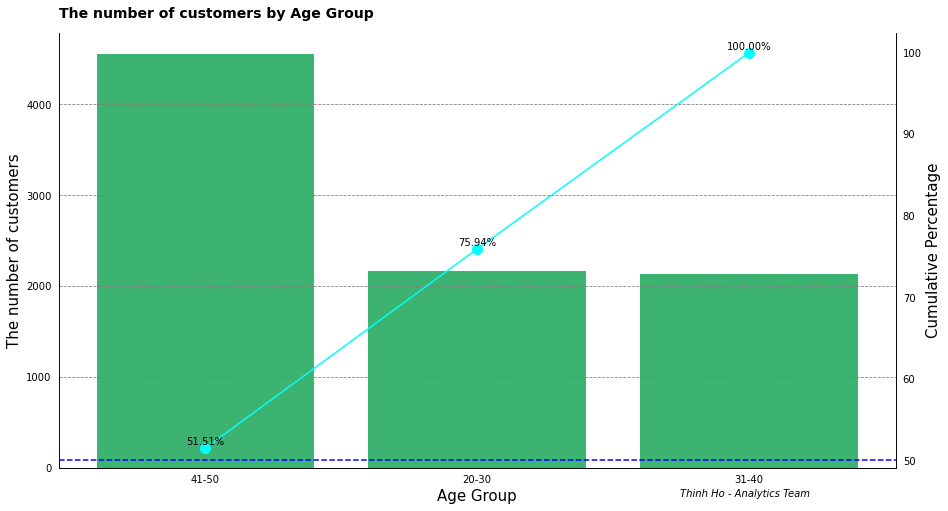

In [19]:
# Set figure and axis
fig, ax1 = plt.subplots(figsize=(15,8))
xs = age_group['Age Group']
ys = age_group['counts']
yl = age_group['Cumumative']

# Plot bars
ax1.bar(xs, ys, color = '#3cb371')

#plot cummulative
ax2 = ax1.twinx()
ax2.plot(xs,yl, color="#00ffff", marker="o", ms=10)

ax2.axhline(50, color="blue", linestyle="--")

#labelling
for x,y in zip(xs,yl):
    if y > 100:
        break
    else:
        label = "{:.2f}".format(y) + '%'

        ax2.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,3), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
#appeal the visual
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.tick_params(left=False, bottom=False)
ax2.tick_params(right=False, bottom=False)         
        
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

#label the axis
ax2.set_ylabel("Cumulative Percentage", fontsize = 15)
ax1.set_xlabel("Age Group", fontsize = 15)
ax1.set_ylabel("The number of customers", fontsize = 15)
plt.suptitle('The number of customers by Age Group', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 0.925)
plt.text(0.7, 0.075, "Thinh Ho - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

## Gender

In [20]:
gender= final['gender'].value_counts().rename_axis('Gender').reset_index(name='total_cust')
gender

,Gender,total_cust
0,Female,4498
1,Male,4354


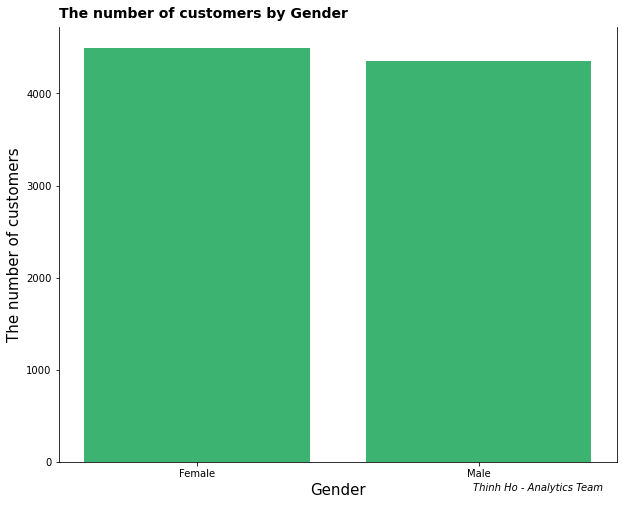

In [21]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.bar(gender['Gender'],gender['total_cust'],color = '#3cb371')

ax1.spines['top'].set_visible(False)
ax1.set_xlabel("Gender", fontsize = 15)
ax1.set_ylabel("The number of customers", fontsize = 15)
plt.suptitle('The number of customers by Gender', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 0.915)
plt.text(0.7, 0.075, "Thinh Ho - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

## Job Industry

In [22]:
job_industry=final['job_industry_category'].value_counts().rename_axis('job_industry_category').reset_index(name='counts')
job_industry['percentage']= job_industry['counts']/job_industry['counts'].sum()*100
job_industry['Cumumative']= job_industry['percentage'].cumsum()
job_industry

,job_industry_category,counts,percentage,Cumumative
0,Manufacturing,2159,24.389968,24.389968
1,Financial Services,2148,24.265703,48.655671
2,Health,1632,18.436512,67.092183
3,Retail,957,10.811116,77.903299
4,Property,681,7.693177,85.596475
5,IT,396,4.473565,90.070041
6,Entertainment,375,4.236331,94.306371
7,Argiculture,343,3.874831,98.181202
8,Telecommunications,161,1.818798,100.000000


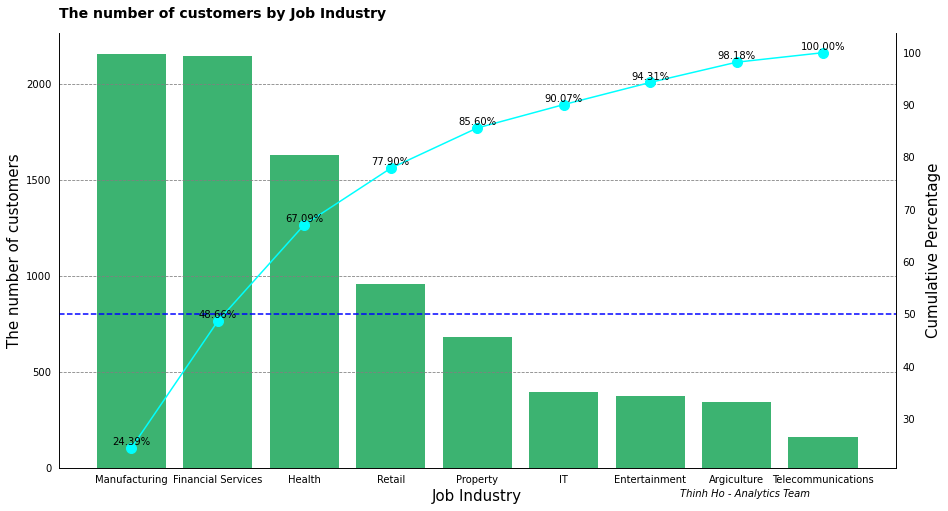

In [23]:
# Set figure and axis
fig, ax1 = plt.subplots(figsize=(15,8))
xs = job_industry['job_industry_category']
ys = job_industry['counts']
yl = job_industry['Cumumative']

# Plot bars
ax1.bar(xs, ys, color = '#3cb371')

#plot cummulative
ax2 = ax1.twinx()
ax2.plot(xs,yl, color="#00ffff", marker="o", ms=10)

ax2.axhline(50, color="blue", linestyle="--")

#labelling
for x,y in zip(xs,yl):
    if y > 100:
        break
    else:
        label = "{:.2f}".format(y) + '%'

        ax2.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,3), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
#appeal the visual
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.tick_params(left=False, bottom=False)
ax2.tick_params(right=False, bottom=False)         
        
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

#label the axis
ax2.set_ylabel("Cumulative Percentage", fontsize = 15)
ax1.set_xlabel("Job Industry", fontsize = 15)
ax1.set_ylabel("The number of customers", fontsize = 15)
plt.suptitle('The number of customers by Job Industry', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 0.925)
plt.text(0.7, 0.075, "Thinh Ho - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

## Wealth Segment

In [24]:
wealth_segment=final['wealth_segment'].value_counts().rename_axis('weath_segment').reset_index(name='counts')
wealth_segment['percentage']= wealth_segment['counts']/wealth_segment['counts'].sum()*100
wealth_segment['cummulative']= wealth_segment['percentage'].cumsum()
wealth_segment

,weath_segment,counts,percentage,cummulative
0,Mass Customer,4308,48.666968,48.666968
1,High Net Worth,2299,25.971532,74.638500
2,Affluent Customer,2245,25.361500,100.000000


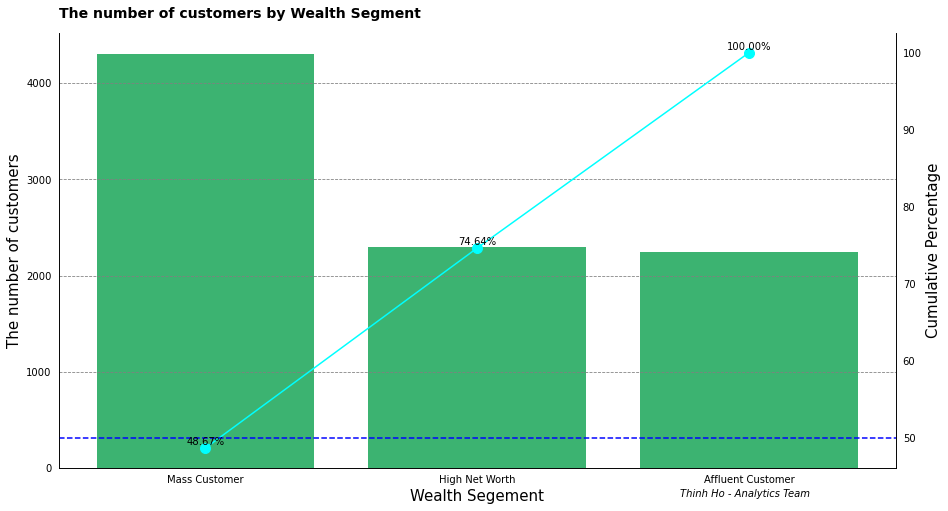

In [25]:
# Set figure and axis
fig, ax1 = plt.subplots(figsize=(15,8))
xs = wealth_segment['weath_segment']
ys = wealth_segment['counts']
yl = wealth_segment['cummulative']

# Plot bars
ax1.bar(xs, ys, color = '#3cb371')

#plot cummulative
ax2 = ax1.twinx()
ax2.plot(xs,yl, color="#00ffff", marker="o", ms=10)

ax2.axhline(50, color="blue", linestyle="--")

#labelling
for x,y in zip(xs,yl):
    if y > 100:
        break
    else:
        label = "{:.2f}".format(y) + '%'

        ax2.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,3), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
#appeal the visual
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.tick_params(left=False, bottom=False)
ax2.tick_params(right=False, bottom=False)         
        
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

#label the axis
ax2.set_ylabel("Cumulative Percentage", fontsize = 15)
ax1.set_xlabel("Wealth Segement", fontsize = 15)
ax1.set_ylabel("The number of customers", fontsize = 15)
plt.suptitle('The number of customers by Wealth Segment', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 0.925)
plt.text(0.7, 0.075, "Thinh Ho - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

## Factor of car owning and geography

In [26]:
 t=final.groupby(['state', 'owns_car']).size().reset_index(name='total')

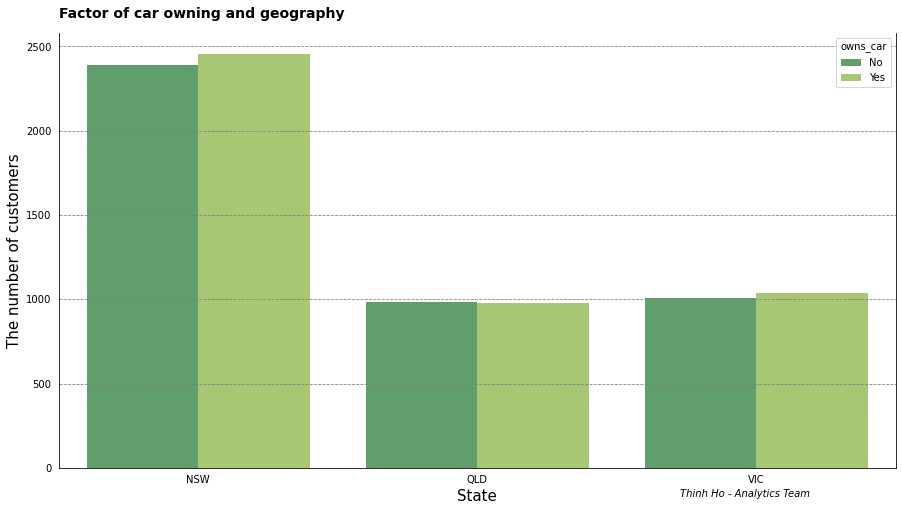

In [27]:
fig, ax1 = plt.subplots(figsize=(15,8))
sns.barplot(x='state',y='total',data=t, hue='owns_car',palette='summer')
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.tick_params(left=False, bottom=False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel("State", fontsize = 15)
ax1.set_ylabel("The number of customers", fontsize = 15)
plt.suptitle('Factor of car owning and geography', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 0.925)
plt.text(0.7, 0.075, "Thinh Ho - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

In [28]:
state_dist=final.groupby(['state']).size().reset_index(name='total')
state_dist['percentage']= state_dist['total']/state_dist['total'].sum()*100
state_dist

,state,total,percentage
0,NSW,4848,54.767284
1,QLD,1960,22.141889
2,VIC,2044,23.090827


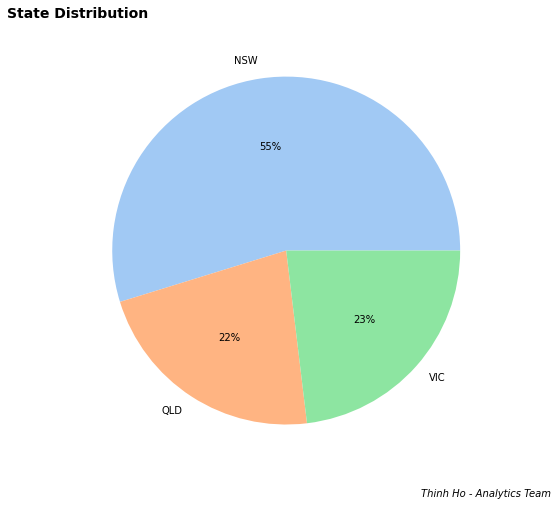

In [29]:
fig, ax1 = plt.subplots(figsize=(10,8))
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
ax1.pie(state_dist.percentage, labels = state_dist.state, colors = colors, autopct='%.0f%%')
plt.suptitle('State Distribution', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 0.925)
plt.text(0.7, 0.075, "Thinh Ho - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

## Property Valuation

In [30]:
prop=final.groupby(['property_valuation'])['profit'].sum().reset_index(name='total')

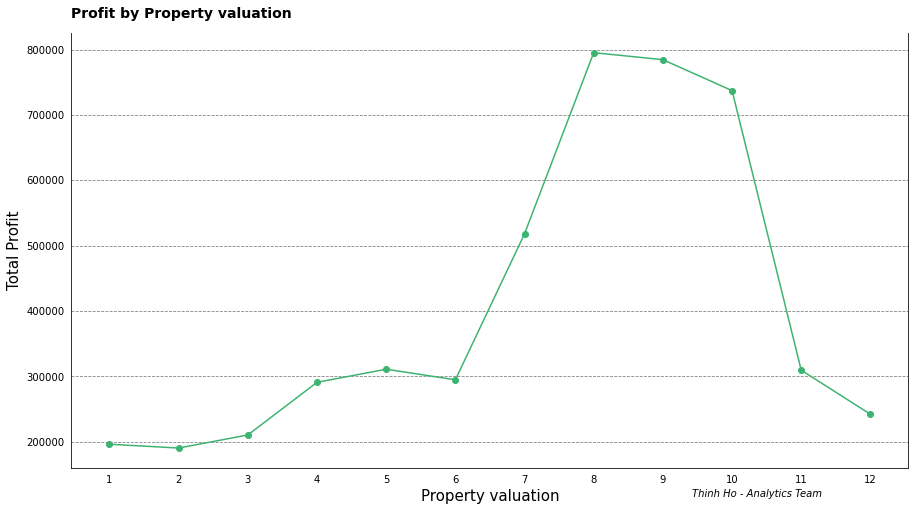

In [31]:
# Set figure and axis
fig, ax1 = plt.subplots(figsize=(15,8))
xs = prop['property_valuation']
ys = prop['total']

# Plot bars
ax1.plot(xs, ys, color = '#3cb371', marker="o")

#appeal the visual
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.tick_params(left=False, bottom=False)              
ax1.spines['top'].set_visible(False)


#label the axis
ax1.set_xlabel("Property valuation", fontsize = 15)
ax1.set_ylabel("Total Profit", fontsize = 15)
ax1.set_xticks(xs)
plt.suptitle('Profit by Property valuation', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 0.925)
plt.text(0.7, 0.075, "Thinh Ho - Analytics Team", style='italic',transform=plt.gcf().transFigure)
plt.show()

In [32]:
new_cust= pd.read_csv('new_customer.csv')
new_cust

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,7/12/57,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,3/22/70,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,8/28/74,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1/28/79,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,9/21/65,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,10/7/59,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000
996,Burk,Wortley,Male,22,10/17/01,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000
997,Melloney,Temby,Female,17,10/5/54,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
998,Dickie,Cubbini,Male,30,12/17/52,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000


In [33]:
new_cust['DOB']= pd.to_datetime(new_cust['DOB'])
new_cust['Age']= 2022- (new_cust['DOB'].dt.year)

In [34]:
potential=new_cust[(new_cust['Age']>=41) & 
              (new_cust['Age']<50) & 
              (new_cust['job_industry_category'].isin(['Manufactoring','Financial Services','Health']))&
             (new_cust['wealth_segment'] == 'Mass Customer') & 
              (new_cust['state'] == 'NSW') & 
              (new_cust['property_valuation'].isin([8,9,10]))]


In [35]:
potential=potential.sort_values(by=['property_valuation'],ascending= False)

In [36]:
potential.shape

(15, 19)

In [37]:
potential

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
13,Melba,Spellacy,Female,38,1976-12-09,VP Marketing,Health,Mass Customer,N,No,4,0591 Anzinger Circle,2232,NSW,Australia,10,14,1.593750,46.0
165,Robert,Corkill,Male,55,1976-03-12,Clinical Specialist,Health,Mass Customer,N,No,4,5612 Toban Point,2227,NSW,Australia,10,166,1.175000,46.0
230,Gothart,Artus,Male,52,1978-05-31,Health Coach IV,Health,Mass Customer,N,Yes,14,21824 Northridge Alley,2117,NSW,Australia,10,231,1.105000,44.0
250,Sunny,Christescu,Female,90,1975-03-12,Cost Accountant,Financial Services,Mass Customer,N,No,11,6668 Blue Bill Park Plaza,2209,NSW,Australia,10,250,1.075000,47.0
780,Therese,Brotherhood,Female,30,1981-07-28,Food Chemist,Health,Mass Customer,N,No,10,25044 Bay Avenue,2042,NSW,Australia,10,780,0.624219,41.0
802,Darlleen,Shalcras,Female,77,1980-09-14,Health Coach I,Health,Mass Customer,N,No,11,383 Graceland Avenue,2010,NSW,Australia,10,801,0.597656,42.0
924,Lezlie,Clemits,Female,2,1973-05-30,Senior Cost Accountant,Financial Services,Mass Customer,N,Yes,15,0504 Nevada Drive,2155,NSW,Australia,10,924,0.488750,49.0
964,Jammie,Seldner,Female,42,1975-02-25,Human Resources Manager,Health,Mass Customer,N,Yes,15,8 Saint Paul Junction,2066,NSW,Australia,10,963,0.440000,47.0
82,Esther,Rooson,Female,14,1981-02-22,NaN,Financial Services,Mass Customer,N,No,5,5186 Main Trail,2046,NSW,Australia,9,78,1.337500,41.0
221,Kort,Disley,Male,66,1979-02-05,Technical Writer,Health,Mass Customer,N,Yes,7,76 Donald Trail,2160,NSW,Australia,9,219,1.125000,43.0


In [38]:
potential.to_excel("output.xlsx",
             sheet_name='Sheet_name_1')